 # <center>Lecture 2: Bayes' Rule  </center>  
 
 ## <center> Instructor: Dr. Hu Chuan-Peng  </center>

## Part 1: 【和鲸平台】整合教学+练习

首先，点击链接加入课程组织：  

https://www.heywhale.com/org/NNUPsy/register?source=href&key=ec08f4798ab34797566769c6#  


![Image Name](https://cdn.kesci.com/upload/sjkv5mr9pt.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkv6sfths.jpeg?imageView2/0/w/960/h/960)  




其次，点击链接获得《Bayesian_2024》的访问权限：  
https://www.heywhale.com/org/NNUPsy/coc-invitation/c1d3f4ae71d74e98f00f9411#  


![Image Name](https://cdn.kesci.com/upload/sjkvdnghh8.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkvdv58qc.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkve2xqw3.jpeg?imageView2/0/w/960/h/960)  


更重要的是：任何问题都可以微信群或者平台里发帖提问。  

助教和老师会尽快回复的 🚀。  


![Image Name](https://cdn.kesci.com/upload/sjkvf5nlsl.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkvfd5d65.jpeg?imageView2/0/w/960/h/960)  



当然，你也可以选择在gitee上进行提问。  
点击链接访问gitee：  
https://gitee.com/hcp4715/bayesian-analysis-nnupsy  

![Image Name](https://cdn.kesci.com/upload/sjkvfsm4c1.jpeg?imageView2/0/w/960/h/960)  


 ## Part 2: 单一事件的贝叶斯模型

**“应用贝叶斯统计预测心理学研究的可重复性”**

在心理学研究领域，研究成果的可重复性一直是学术界关注的焦点。随着研究数量的激增，如何辨别研究的可靠性与有效性成为一大挑战。

**在此，我们邀请您成为“研究质量评估师”，协助同行和公众判断心理学研究的可重复性。**
- 一项针对心理学领域299项研究的分析显示，难以复现的研究往往在表述上显得模糊不清，而易于复现的研究则展现出更为明确的语言风格。
- 那么，是否可以通过研究中的语言特征来预测其可重复性？贝叶斯统计方法为我们提供了一种新的视角。


> Herzenstein, M., Rosario, S., Oblander, S., & Netzer, O. (2024). The language of (non)replicable social science. Psychological Science, 9567976241254037. https://doi.org/10.1177/09567976241254037

![](https://ts1.cn.mm.bing.net/th/id/R-C.731009a73ae214544069da8c4b82e700?rik=N82z8PPz9aYv8w&riu=http%3a%2f%2ftheneuroeconomist.com%2fwp-content%2fuploads%2f2016%2f02%2fReplication-1024x687.png&ehk=LtgTorTAX4C4aTtiDDt1shb3Kvob9%2fp5d6a8CGBjYbY%3d&risl=&pid=ImgRaw&r=0)
> https://theneuroeconomist.com/2016/03/is-the-replication-crisis-in-psychology-real/

以下代码展示了部分数据，包括研究的编号 (tiltle)，文章是否可被重复 (replicated), 文章表述的积极性 (posemo)，文章结果描述的确定性 (certain和language_style)。

In [1]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt

# 使用 pandas 导入示例数据
try:
  df = pd.read_csv(".../replicated_language_cleaned.csv")  #TODO: 修改为和鲸平台数据路径
except:
  df= pd.read_csv('data/replicated_language_cleaned.csv')

df = df.drop('study_name', axis=1)
df.head()

# 设置APA 7的画图样式
plt.rcParams.update({
    'figure.figsize': (4, 3),      # 设置画布大小
    'font.size': 12,               # 设置字体大小
    'axes.titlesize': 12,          # 标题字体大小
    'axes.labelsize': 12,          # 轴标签字体大小
    'xtick.labelsize': 12,         # x轴刻度字体大小
    'ytick.labelsize': 12,         # y轴刻度字体大小
    'lines.linewidth': 1,          # 线宽
    'axes.linewidth': 1,           # 轴线宽度
    'axes.edgecolor': 'black',     # 设置轴线颜色为黑色
    'axes.facecolor': 'white',     # 轴背景颜色（白色）
    'xtick.direction': 'in',       # x轴刻度线向内
    'ytick.direction': 'out',      # y轴刻度线向内和向外
    'xtick.major.size': 6,         # x轴主刻度线长度
    'ytick.major.size': 6,         # y轴主刻度线长度
    'xtick.minor.size': 4,         # x轴次刻度线长度（如果启用次刻度线）
    'ytick.minor.size': 4,         # y轴次刻度线长度（如果启用次刻度线）
    'xtick.major.width': 1,        # x轴主刻度线宽度
    'ytick.major.width': 1,        # y轴主刻度线宽度
    'xtick.minor.width': 0.5,      # x轴次刻度线宽度（如果启用次刻度线）
    'ytick.minor.width': 0.5,      # y轴次刻度线宽度（如果启用次刻度线）
    'ytick.labelleft': True,       # y轴标签左侧显示
    'ytick.labelright': False      # 禁用y轴标签右侧显示
})

In [16]:
# 数据预处理
# 计算 'certain' 列的中位数
median_certain = df['certain'].median()

# 创建新列，编码规则：大于中位数为 1，小于等于中位数为 2
df['language_style'] = df['certain'].apply(lambda x: 1 if x > median_certain else 0)

df['language_style_code'] = df['language_style'].map({1:"certain",0:"uncertain"})
df['replicated_code'] = df['replicated'].map({1:"yes",0:"no"})

# 输出结果
df.head()

,study_id,replicated,posemo,certain,language_style,language_style_code,replicated_code
0,1,1.0,1.36,1.75,1,certain,yes
1,3,0.0,1.92,1.17,1,certain,no
2,4,1.0,1.41,1.36,1,certain,yes
3,5,0.0,1.85,0.69,0,uncertain,no
4,6,0.0,0.63,0.72,0,uncertain,no


### 先验 (prior) 和 数据 (data) 的差异  

#### 先验  

先验是指在*当前事件*发生之前，对事件发生的事先猜测或推断。例如，“太阳今天能否从东边升起”，根据以往的经验，太阳几乎每天都从东边升起，因此我们可以合理地推测，太阳今天从东边升起的先验概率非常接近100%。

在本例中，根据经验，我们假设(先验)得出约40%的实验是可重复的，而通过观测实际数据，得到了42.14%的可重复实验。
这说明数据与我们的先验经验较为一致，但略有差异。

- 先验可以是完全主观的。例如，有的人可能认为50%的研究是可重复的，而另一些人则根据不同的经验或数据得出30%的先验概率。
- 关键点在于，先验是对事件发生之前的主观看法，而不是基于新数据的结论。

In [17]:
# 计算可重复性研究的数量和百分比 
level_counts = df['replicated_code'].value_counts()
level_percentages = df['replicated_code'].value_counts(normalize=True) * 100

# 百分比保留两位小数
level_percentages = level_percentages.round(2)

# 创建一个新的 DataFrame 合并结果
result_df = pd.DataFrame({'数量': level_counts, '百分比': level_percentages})
# 展示结果
result_df

,数量,百分比
replicated_code,,
no,173,57.86
yes,126,42.14


#### 数据  

之前的信息只考虑了可重复研究与不可重复研究的比例，根据这一简单的比率，我们只能得到关于研究可重复性的一般性推测。  

一个有趣的现象是，使用更确切的语言风格的研究，往往更容易被重复。例如，研究中使用明确、果断的表述，如“我们的结果高度可靠”。

我们的**数据**也支持这一点，通过查看数据集可发现，约45%（78/173）的不可重复研究使用了确切的语言风格，而在可重复的研究中，有 56%（71/126）的研究使用了确切的语言风格:

In [30]:
# 计算不同水平的数量
result_df = df.groupby(['replicated_code', 'language_style_code']).size().unstack()
# 结果
result_df

language_style_code,certain,uncertain
replicated_code,,
no,78,95
yes,71,55


#### 先验 vs 数据  

现在，我们获得了两种信息：先验信息 (prior) 表明 40% 的研究是可重复的，而通过数据 (data) 分析发现，使用更自信语言的研究更有可能是可重复的。  

我们如何结合两种信息进行推断？ 如何在先验信息与数据之间进行权衡？  

这就是贝叶斯学派关注的问题。  

$$  
Posterior = \frac {data * \, prior}{Average \, probability \, of \, data}  
$$  

![Image Name](https://cdn.kesci.com/upload/sjkvl0f6gx.png?imageView2/0/w/960/h/960)  

#### 先验概率模型(Prior probability model)  

之前，我们假设一项研究可被重复的概率为40%，这意味着其不可被重复的概率为60%。
我们可以用一种数学模型(公式)来表示：  

$$  
P(B) = 0.40 \\  

P(B^{c}) = 0.60  
$$  

$B$表示一项研究为可重复性研究的概率，$B^{c}$则表示一篇研究不可重复性研究的概率($B^{c}:B$ complement)



| 事件	    |$B$         |$B^{c}$ |Total|  
|---------- |------------|--------|-----|  
|probability|0.4         |0.6     |1    |  



**$P(B)$** 和 **$P(B^{c})$** 构成了研究可重复性概率的先验模型(prior model)  

作为一个有效的概率模型(valid probability model)，它必须：  

（1）考虑所有可能的事件（所有文章都必须是可重复或不可重复的，没有其他可能性）；  

（2）它为每个事件分配先验概率；  

（3）这些概率加起来为1。

### 数据模型（条件概率与似然性）

借鉴先验模型的构建方式，我们同样可以采用模型（即公式）来表征数据结果。
- 首先，我们用符号 $B$ 来指代研究的可重复性，
- 接着，用 $A$ 表示那些在表述上显得自信的研究。

我们可以将数据结果形式化，通过条件概率来量化文章展现出语言自信度的可能性。具体如下：
$$
P(A|B^{c}) = 0.4508 \approx 45\%
$$
- 这表明，在研究不可重复的情境下，使用确切语言的概率大约为 45%。
$$
P(A|B) = 0.5635 \approx 56\%
$$
- 这意味着，当研究是可重复的，使用确切语言的概率提升至大约 56%。

#### 条件概率

接下来，我们将探讨条件概率，用符号 $P(A|B)$ 表示，这代表的是在事件 B 发生的条件下，事件 A 发生的概率。比较 $P(A|B)$ 与 $P(A)$ 可以揭示事件 B 的发生如何改变我们对事件 A 发生概率的看法。

以下是一些说明条件概率特性的实例：

1. 有时，事件 B 的发生可能会提高事件 A 发生的概率。例如，习惯性跑步的人参加马拉松比赛的概率会高于普通人，这可以表示为：
   $$
   P(参加马拉松|跑步) > P(参加马拉松)
   $$
2. 另一方面，事件 B 的发生也可能降低事件 A 发生的概率。例如，如果一个人坚持每天跑步，那么他超重的可能性可能会低于平均水平，即：
   $$
   P(超重|跑步) < P(超重)
   $$
3. 需要注意的是，条件概率 $P(A|B)$ 通常不等于 $P(B|A)$。例如，所有的苹果都是水果，但并非所有的水果都是苹果，因此：
   $$
   P(水果|苹果) = 1
   $$
   $$
   P(苹果|水果) < 1
   $$
4. 当事件 A 和事件 B 相互独立时，事件 B 的发生不会改变我们对事件 A 发生概率的看法。例如，天气晴朗与中彩票之间没有关联，它们是独立的事件，因此：
   $$
   P(赢得彩票|天气晴朗) = P(赢得彩票)
   $$

通过这些例子，我们可以更清楚地理解条件概率的概念，并认识到在分析数据时考虑事件之间的相互关系是多么重要。在心理学研究中，这有助于我们更准确地预测和解释研究结果的复现性。


#### 似然(likelihood)  

**似然的定义**  

从条件概率中我们知道，$P(A|B) = 0.56，P(A|B^{c}) = 0.45$，即使用确切语言的研究更有可能是可重复的。

因此，当前的数据（研究使用确切语言）在某种假设下出现的可能性较大。在这个例子中，我们比较不同假设下数据出现的可能性：

那么当前的数据（使用更确切的语言）更可能在某种假设下出现。在这个例子中，我们比较不同假设下当前数据出现的可能性：  

$P(A|B) = 0.56 > P(A|B^{c}) = 0.45$  

这就是似然函数(likelihood function)的含义，它表明在不同**先验**下，数据$A$出现的概率，即条件概率的组合。


例如，针对“数据 A：研究使用确切语言”的似然函数可以写成：$L(*|A)$  
$$  
L(B|A) = P(A|B) \quad\quad L(B^{c}|A) = P(A|B^{c})  
$$  

这表示在“研究可重复”和“研究不可重复”两种假设下，使用确切语言的概率。

注意：在似然函数中，数据（即研究表达是否是确切的）是已知的，而假设（研究是否可重复）是我们根据经验先验设置的。

#### 概率(Probability) vs 似然(likelihood)  

🤔概率和似然似乎都在表示某种可能性，它们的区别是什么呢？
  
| 特性        | 概率 (Probability)                                      | 似然 (Likelihood)                                   |  
|-------------|---------------------------------------------------------|----------------------------------------------------|  
| 定义        | 在已知条件下事件发生的可能性                           | 观察结果下假设为真条件下生成观察结果的可能性     |  
| 范围        | [0, 1]                                                 | 不限于 [0, 1]                                     |  
| 总和        | 所有可能事件的总和为1                                  | 可以不等于1                                       |  
| 应用        | 预测和决策                                           | 模型估计和选择                                     |  

注意：  
* 先验概率的总和等于1，因为先验表示所有可能结果的分布，表示事件B发生的概率，是我们的主观推测；  
* 似然总和不等于1，因为似然函数不是概率函数，它告诉我们事件A在不同假设下发生的相对可能性。

根据我们的例子，概率和似然可以整理为下表：

TABLE 2.2: Prior probabilities and likelihoods of reproducible research.  

| event       |     $B$     |     $B^c$   |   total   |  
|-------------|--------------|--------------|-----------|  
| prior       |      0.4    |      0.6     |     1     |  
| likelihood   |     0.56    |     0.45     |   ≠ 1     |

#### 分母（normalizing constant）-- **边际概率 (marginal probability)**  

似然函数有效总结了在可重复性研究中使用自信语言的情况，但我们仍然需要得知，在所有研究中使用自信语言的总体概率如何。  
这被称为边际概率 $P(A)$  


$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average probability of data} = \frac{P(A\cap B)}{P(A)} = \frac{L(B|A) * P(B)}{P(A)}  
$$  
 
所有研究中使用自信语言的概率可以分为两部分：  

1. 可重复研究中使用自信语言的概率，即$P(A\cap B)$  
2. 不可重复研究中使用自信语言的概率，即$P(A\cap B^{c})$  

两者之和即为边际概率。  
$$  
 P(A) = P(A \cap B) + P(A \cap B^{c}) = L(B|A) * P(B) + L(B^{c} | A) * P(B^{c})  
$$  

$$ P(A) = 0.56 * 0.4 + 0.45* 0.6 = 0.494 $$  


### 后验概率模型(Posterior probability model via Bayes’ Rule)

**直觉理解**  

现在，我们来尝试计算后验概率，比如计算使用自信语言的研究是可重复的概率$P(B|A)$。  

在正式计算之前，我们可以回顾一下这个表格来建立一些直觉。  

||$B$|$B^c$|Total|  
|---|---|---|---|  
|$A$|0.224|0.27|0.494|  
|$A^c$|0.176|0.33|0.506|  
|Total|0.4|0.6|1.0|  

note：
- $A$ ：表示使用确切语言的研究。
- $A^c$ ：表示不使用确切语言的研究。
- $B$ ：表示研究是可重复的。
- $B^c$ ：表示研究不可重复的。



因为我们知道这项研究使用了自信语言，所以我们直接锁定A行，  
- 在A行中，45.3%(0.224/0.494)的研究是可重复的，35.6%(0.176/0.494)的研究是不可重复的。  
- 因此，根据后验概率 45.3%的可能性可以认为当前这一研究是可重复的。  


**正式计算**  

如何凭借贝叶斯公式的数学形式推导得到该结果？  

$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average \, probability \, of \, data} ={\frac{P(A\cap B)}{P(A)}}={\frac{L(B|A) * P(B)}{L(B|A) * P(B) + L(B^{c}|A) * P(B^{c})}}  
$$  

- $P(B|A)={\frac{P(B)L(B|A)}{P(A)}}={\frac{0.4\cdot0.56}{0.494}}=0.453$  
- 当带入之前计算得到的数值到贝叶斯公式中，我们得到了自信语言为不可重复研究的概率。  

使用同样的方法，我们可以计算出未使用自信语言的研究为不可重复研究的概率，结果如下表。  
- 可以注意到：先验概率和后验概率的和均等于1。  

TABLE 2.4: The prior and posterior models of reproducibility.  


| event    | $B$     | $B^c$ | Total    |  
| --------  | -------- | -------- | -------- |  
| prior probability | 0.4 | 0.6 | 1 |  
| posterior probability | 0.453 | 0.547 | 1 |  


思考时间🧐：是否加入分母进行计算，在哪种情况下后验概率之和不为1？

#### 后验概率计算模拟练习


🤓为了深入理解先验知识、似然（数据）和后验概率，我们将通过编写代码来计算后验概率，以增强对这些概念的理解和实践能力。

1. 定义研究的可重复性与相应的先验概率

In [19]:
# 定义文章类型
article = pd.DataFrame({'replicated_code': ['yes', 'no']})

# 定义先验概率
prior = [0.6, 0.4]

2. 模拟一些可能被投放给你的研究

In [27]:
# 模拟生成 10000 项研究，包括其类型
np.random.seed(84735)
article_sim = article.sample(n=10000, weights=prior, replace=True)
# 查看前 10 行数据
article_sim.head(10)

,replicated_code
0,yes
1,no
1,no
1,no
1,no
0,yes
1,no
1,no
1,no
0,yes


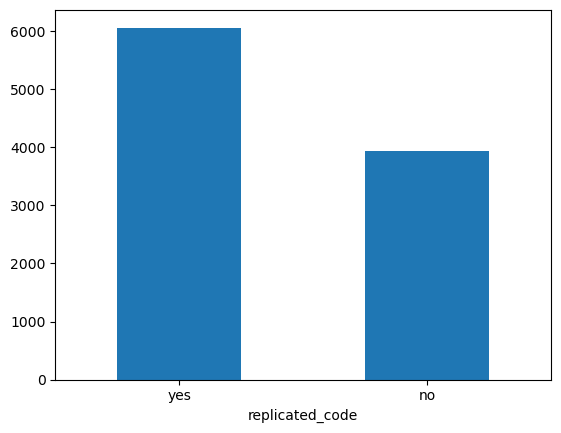

In [28]:
#我们可以通过画图来查看这些被投放研究的可重复性比例。
article_sim['replicated_code'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

3. 接下来我们需要模拟10000项研究使用确切语言风格的情况，  
- 和之前相同，不可重复研究使用确切语言风格的可能性为45% ，  
- 可重复研究使用确切语言风格的可能性为56% 

In [29]:
# 设置条件概率
article_sim['data_model'] = np.where(article_sim['replicated_code'] == 'no', 0.2667, 0.0222)

# 定义研究是否使用确切语言
data = ['certain', 'uncertain']

# 设置随机种子，以便得到重复的结果
rng=np.random.default_rng(84735)
# 生成确切语言相关的数据
article_sim['language'] = article_sim.apply(lambda x: rng.choice(data, 1, p = [x.data_model, 1-x.data_model])[0], axis=1)

In [30]:
# 显示每个类别研究数量
(
  article_sim.groupby(['language', 'replicated_code'])
    .size()
    .unstack(fill_value=0)
)

replicated_code,no,yes
language,,
certain,1039,125
uncertain,2899,5937


4. 计算后验值  

还记得我们的先验概率为：  
- 可重复研究  $P(B)=0.4$  
- 不可重复性研究 $P(B^c)=0.6$,  


由以上结果可计算似然：  
- 大约26%(1039/(1039+2899))的可重复性研究使用了自信语言, $P(A|B)=0.26$
- 2%的不可重复性研究使用自信语言(125/(125+5937)), $P(A|B^c)=0.02$

结合先验和似然，我们可以进一步计算分母(边际概率)：  
- $L(B|A)*P(B) + L(B^{c}|A)*P(B^{c}) = 0.26*0.4 + 0.02*0.6 = 0.116$  

最后，我们可以计算的到后验 (使用自信语言研究中，可重复性研究的概率)：  
- $P(B|A) ={\frac{L(B|A)*P(B)}{P(A)}}= (0.26*0.4)/0.116 = 89\%$  
- 在10000项研究中，使用自信语言的研究有1164篇(分母)  
- 而现在，我们可以知道，在使用自信语言的研究中，89%(1039/1164)的研究为可重复研究

In [26]:
usage_yes = article_sim[article_sim['language'] == 'certain']
print('使用确切语言的研究', usage_yes['replicated_code'].value_counts().sum())
usage_yes['replicated_code'].value_counts()

使用确切语言的研究 1164


replicated_code
no     1039
yes     125
Name: count, dtype: int64

同样地，通过画图来可视化使用确切语言的研究的情况

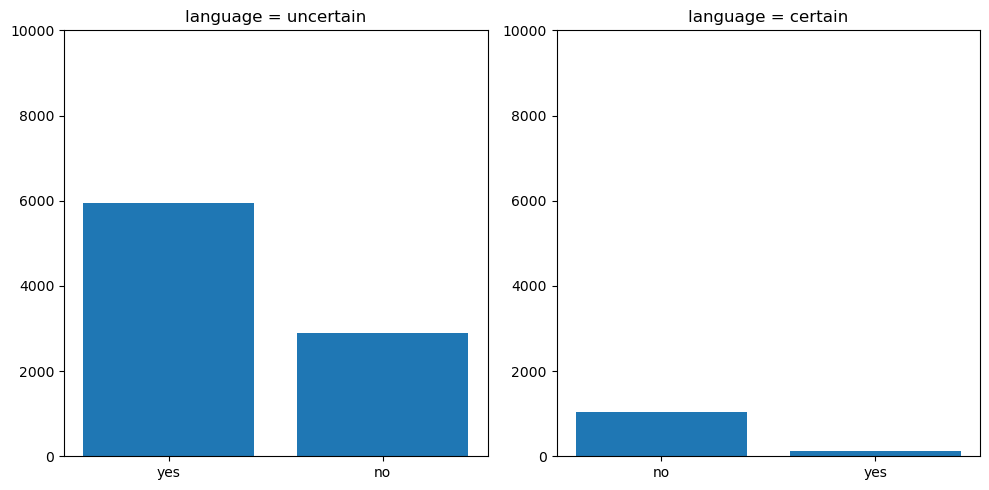

In [46]:
# 定义两幅图的坐标
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 绘制两幅图
for i, u in enumerate(article_sim['language'].unique()):
    ax = axes[i]
    data = article_sim[article_sim['language'] == u]
    ax.bar(data['replicated_code'].unique(), data['replicated_code'].value_counts())
    ax.set_title(f'language = {u}')
    ax.set_ylim(0, 10000) 

# 显示   
fig.tight_layout()
plt.show()

### 总结 (Recap)  

回到之前的问题：如何预测研究的可重复性？  
- 哪些信念可以作为先验概率？  
- 信息的哪些属性可以作为数据？  
- 如何结合先验和数据更新信念 (贝叶斯公式)。  
- 如何通过 python 实现以上的计算？

## Part3 随机变量的贝叶斯模型

**随机变量 (random variables)**  

在之前的分析中，我们讨论了“可重复性研究”这一随机事件。接下来我们会针对更加抽象和一般性的**随机变量**进行贝叶斯分析。  

假设为了研究可重复性问题，一个有能力且资金充足的研究团队计划进行一系列可重复性实验，他们希望了解这些实验成功重复的比例是多少。  

首先我们来了解一个概念，胜率或成功率  

* 想象你玩斗地主，有五局三胜，七局四胜这一说，一轮玩下来，就会出现胜率。  
* 然而，胜率并不是一成不变的，它会随着每次游戏的输赢而变化。  
* 在每一轮开始前，你并不会知道你这次的胜率是多少  

在我们的例子中，假设计划对6项研究进行重复实验。
- 假设该团队对于任何研究成功复现的成功率为$\pi$，$\pi$是**未知的且会随着时间波动**，所以$\pi$是一个随机变量。  
- 根据团队先前的成果与经验，我们猜测其成功复现的成功率为 $\pi = 50\%$。  
- 他接下来可能成功复现的次数Y可能是0，可能是1，也可能是6，可以有7种可能的成功复现次数，Y \in \{0,1,2,3,4,5,6\} 

🤔虽然我们知道他们的平均成功率为 $\pi = 50\%$，但问题在于对于每一种复现成功的次数，其可能性分别是多少呢？ 

**二项式模型**  

要计算每一种结果的可能性，我们可以用二项分布来建模。  

该团队的成功率为$\pi$，$在\pi$下某成功次数发生的概率可表示为：  

$$  
f(y|\pi) = \binom{n}{y} \pi^{y}(1-\pi)^{n-y} \quad\quad for\;y \in \{0,1,2,...,n\}  
$$  
$$  
\binom{n}{y} = \frac{n!}{y!(n-y)!}  
$$  

$\pi$ 表示成功的可能性，$y$表示在$n$个试次中成功的次数，二项模型含有的前提假设是：  

(1) 所有试次发生都是相互独立的  

(2) 在每个试次中，成功的概率都是一个固定的值$\pi$  


比如，成功次数为0~6 的可能性可以分别写成：  

$$  
f(Y=0|\pi=0.5) = \binom{6}{0} 0.5^0 (1-0.5)^{6}  
$$  
$$  
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}  
$$  
$$  
...  
$$  
$$  
f(Y=5|\pi=0.5) = \binom{6}{5} 0.5^{5} (1-0.5)^{1}  
$$  
$$  
f(Y=6|\pi=0.5) = \binom{6}{6} 0.5^{6} (1-0.5)^{0}  
$$  

我们可以使用代码帮助计算  
 `st.binom.pmf(y, n, p)`。其中 p 对应公式中的 $\pi$。

In [1]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 

# 设置APA 7的画图样式
plt.rcParams.update({
    'figure.figsize': (4, 3),      # 设置画布大小
    'font.size': 12,               # 设置字体大小
    'axes.titlesize': 12,          # 标题字体大小
    'axes.labelsize': 12,          # 轴标签字体大小
    'xtick.labelsize': 12,         # x轴刻度字体大小
    'ytick.labelsize': 12,         # y轴刻度字体大小
    'lines.linewidth': 1,          # 线宽
    'axes.linewidth': 1,           # 轴线宽度
    'axes.edgecolor': 'black',     # 设置轴线颜色为黑色
    'axes.facecolor': 'white',     # 轴背景颜色（白色）
    'xtick.direction': 'in',       # x轴刻度线向内
    'ytick.direction': 'out',      # y轴刻度线向内和向外
    'xtick.major.size': 6,         # x轴主刻度线长度
    'ytick.major.size': 6,         # y轴主刻度线长度
    'xtick.minor.size': 4,         # x轴次刻度线长度（如果启用次刻度线）
    'ytick.minor.size': 4,         # y轴次刻度线长度（如果启用次刻度线）
    'xtick.major.width': 1,        # x轴主刻度线宽度
    'ytick.major.width': 1,        # y轴主刻度线宽度
    'xtick.minor.width': 0.5,      # x轴次刻度线宽度（如果启用次刻度线）
    'ytick.minor.width': 0.5,      # y轴次刻度线宽度（如果启用次刻度线）
    'ytick.labelleft': True,       # y轴标签左侧显示
    'ytick.labelright': False      # 禁用y轴标签右侧显示
})

In [2]:
y = [0,1,2,3,4,5,6]  # 成功次数 
n = 6                # 重复研究总次数
p = 0.5              # 假设的成功概率

# 计算概率值
prob = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({"成功次数":y, "概率":prob})
result_table

,获胜次数,概率
0,0,0.015625
1,1,0.093750
2,2,0.234375
3,3,0.312500
4,4,0.234375
5,5,0.093750
6,6,0.015625


*显然，当团队的成功概率为 0.5 时，其在六次研究中获得 y=3 次成功的概率最高(p = 0.216)。*

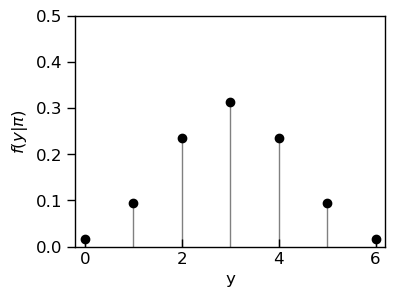

In [3]:
# 绘制灰色竖线
for i, j in zip(y , prob):
    plt.plot([i, i], [j, 0], 'gray', linestyle='-', linewidth=1, zorder=1, )

# 绘制黑色点(各成功率次数的成功率)
plt.scatter(y, prob, c='black')

plt.ylabel('$f(y|\pi)$')
plt.xlabel('y')

plt.xlim(-0.2,6.2)
plt.ylim(0,0.5)
plt.show()


**概率质量密度函数(probability mass function, pmf)：** 用来描述离散型随机变量在各特定取值上的概率  

在上图中我们看到，成功次数y在不同的取值上的概率不同。  

* 由于$y$的个数是有限的，并且是随机发生的，我们把$y$称为离散型随机变量，而$y$发生的概率$f(y)$则被称为概率密度函数  


对于离散型随机变量$Y$，$Y$各取值的概率由$f(y)$指定：  
$$  
f(y) = P(Y=y)  
$$  

并且有如下性质：  

* 对所有y的取值来说，$0\leq f(y) \leq 1$  
* $\sum_{all\,\pmb{y}}f(y) = 1$，y取值的所有概率之和为1

In [4]:
sum(result_table['概率'])

1.0000000000000002

### 二项似然函数(The Binomial likelihood function)

**不同的信念**  

尽管该团队成功申请了项目基金，但并不是所有人都认同他们的成功复现率为 50%。  

对于团队成功的可能性，不同的人可能持有不同的信念：  

- 乐观派认为该团队的成功概率为 0.8，表示对实验成功复现持高度信心。  
- 悲观派则认为该团队的成功概率仅为 0.2，意味着对实验成功复现不太乐观。  

成功的概率影响着他们对研究复现结果的预期：如果团队的成功概率高，那么6次研究中成功复现的次数会更多；  
反之，如果成功概率低，那么研究复现的失败次数就会更多。  

我们可以计算持不同信念的人心中，该团队在6项研究中成功复现的次数的概率分布并画图。

In [7]:
y = [0,1,2,3,4,5,6]  # 成功次数 
n = 6                # 研究总次数

# 计算似然值
p = 0.5              # 根据以往战绩假设的成功概率
likelihood1 = st.binom.pmf(y, n, p)
p = 0.8              # Kasparov支持者眼中的成功概率
likelihood2 = st.binom.pmf(y, n, p)
p = 0.2              # 深蓝支持者眼中的成功概率
likelihood3 = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({
  "成功次数":y, 
  "本团队(pi=0.5)":likelihood1, 
  "悲观派(pi=0.2)":likelihood2, 
  "乐观派(pi=0.8)":likelihood3})
result_table

,获胜次数,本团队(pi=0.5),悲观派(pi=0.2),乐观派(pi=0.8)
0,0,0.015625,0.000064,0.262144
1,1,0.093750,0.001536,0.393216
2,2,0.234375,0.015360,0.245760
3,3,0.312500,0.081920,0.081920
4,4,0.234375,0.245760,0.015360
5,5,0.093750,0.393216,0.001536
6,6,0.015625,0.262144,0.000064


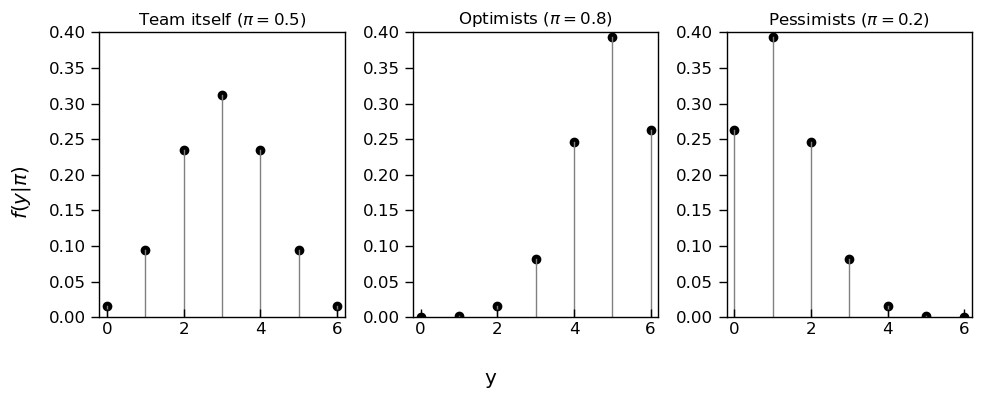

In [10]:
# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# 绘制三个图,每个子图类似原图
three_pi = ["Team itself ($\pi = 0.5$)","Optimists ($\pi = 0.8$)","Pessimists ($\pi = 0.2$)"]
likelihoods = [likelihood1, likelihood2, likelihood3]
for i, ax in enumerate(axs):
    
    ax.scatter(y, likelihoods[i], c='black')
    
    for xx, yy in zip(y, likelihoods[i]):
        ax.plot([xx, xx], [yy, 0], 'gray', linestyle='-', linewidth=1, zorder=1)
    
    # 添加facet
    ax.set_title(three_pi[i])

    ax.set_xlim(-0.2,6.2)
    ax.set_ylim(0,0.4)

fig.supylabel('$f(y|\pi)$')
fig.supxlabel('y')
plt.tight_layout()
plt.show()

显然，对于乐观派来说，团队取得六次成功的概率远高于其他成功次数。而对于悲观派来说，团队全败的可能性远高于其他成功次数。  
- 换句话说，若团队在6项研究中仅成功复现一次，这种情况在低成功率下更可能出现，在高成功率下几乎不可能出现。  
- 那么团队成功重复的成功率率，更可能(likelihood)是悲观派设想的那样($\pi = 0.2$)。  

例如，在乐观派和悲观派眼中(不同成功率$\pi$下)，6项研究只成功1次的似然(likelihood)。  

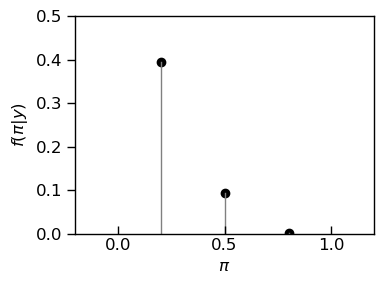

In [18]:
# 定义成功次数和研究总次数
y = 1  # 成功次数，作为数组处理以便向量化计算
n = 6  # 研究总次数

# 计算似然值，对于三种不同的成功概率 p
p_values = [0.5, 0.8, 0.2]          # 定义三种成功率
likelihoods = []                    # 用于存储每种成功率的似然值结果

for p in p_values:
    likelihood = st.binom.pmf(y, n, p)  # 使用st.binom.pmf计算似然值
    likelihoods.append(likelihood)      # 将结果添加到列表中


# 创建图形和子图
fig, ax = plt.subplots()  # 此处应该是 plt.subplots() 而不是 plt.subplot()
ax.scatter(p_values, likelihoods, c='black')
# 设置x轴和y轴的限制应该在绘制线条之前完成，以避免重复设置
ax.set_xlim(-0.2, 1.2)  # x轴范围根据p_values调整，最大不应超过1
ax.set_ylim(0, 0.5)
for xx, yy in zip(p_values, likelihoods):
    ax.plot([xx, xx], [0, yy], 'gray', linestyle='-', linewidth=1, zorder=1)
    # 注意这里的顺序是 [0, yy] 而不是 [yy, 0]，因为我们希望从x轴画到对应的似然值
# 设置坐标轴标签，直接使用ax的方法，而不是fig的方法
ax.set_ylabel('$f(\pi|y)$')  # 使用ax.set_ylabel而不是fig.supylabel
ax.set_xlabel('$\pi$')         # 使用ax.set_xlabel而不是fig.supxlabel
plt.tight_layout()  # 调整布局以避免标签重叠
plt.show()

**似然函数**  

当团队只成功复现一次时，该事件在不同成功率下出现的可能性可以写为：  

$$  
f(Y=1|\pi=0.2) = \binom{6}{1} 0.2^1 (1-0.2)^{5}  
$$  
$$  
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}  
$$  
$$  
f(Y=1|\pi=0.8) = \binom{6}{1} 0.8^1 (1-0.8)^{5}  
$$  

因此，成功复现次数为1时的似然函数可以写成  

$$  
L(\pi|y=1) = f(y=1|\pi) = \binom{6}{1} \pi^{1}(1-\pi)^{6-1} = 6\pi(1-\pi)^{5}  
$$  

不同成功率下的似然：  

| $\pi$	        |0.2    |0.5    |0.8  
|---------------|-----  |----   |----|  
|$f(\pi \| y=1)$   |0.3932  |0.0938 |0.0015|  




**注意：**  

似然函数表示的是，在各种可能的成功率$\pi$下,成功次数$Y=1$的可能性，所以  
1. 该似然函数公式只取决于$\pi$  
2. 似然函数的总和加起来不为1（从条件概率的公式来看，似然函数的分母是不同的）

#### Conditional PMF VS likelihood function

🤓当$\pi$是已知的，条件概率质量密度函数$f(·|\pi)$允许我们比较在$\pi$发生的前提下，各种可能数据$Y$(e.g., $y_{1},y_{2}$)发生的概率。  
$$  
f(y_{1}|\pi) \; vs \; f(y_{2}|\pi)  
$$  

当$Y = y$是已知的，似然函数$L(·|y)= f(y|·)$允许我们比较在各种不同的$\pi$(e.g., $\pi_{1},\pi_{2}$)下，观察到数据$y$的相对可能性(relative likelihood)。  


$$
L(\pi_{1}|y) \; \text{与} \; L(\pi_{2}|y)
$$
$$
\text{即}
$$
$$
f(y|\pi_{1}) \; \text{与} \; f(y|\pi_{2})
$$


**使用二项模型来描述成功次数与成功率的关系**  

在$n = 6$的研究中，团队成功复现的次数与成功率的关系符合二项式模型  

$$  
Y|\pi \sim Bin(6,\pi)  
$$  


$$  
f(y|\pi) = \binom{6}{y} \pi^{y}(1-\pi)^{6-y} \quad\quad for\;y \in \{0,1,2,3,4,5,6\}  
$$  

-----------------------------------  

下图给出了几种 $f(y|\pi)$，即在不同成功率$\pi$下，不同成功次数$Y$发生的可能性。  
* 黑线表示在特定成功率下，Y=1(赢一次)的似然值  

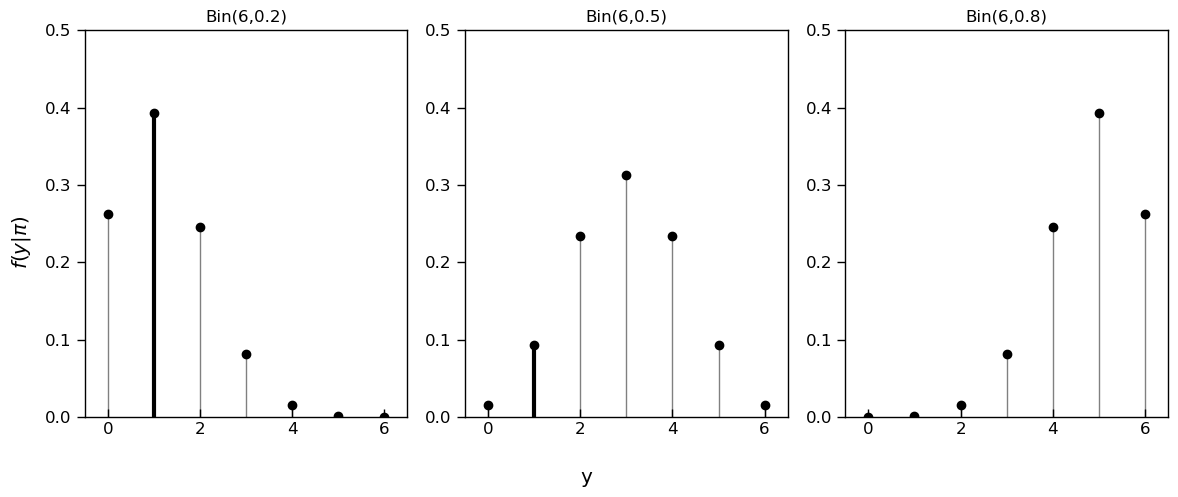

In [20]:
# Values for Y (number of successes in n trials)
y = np.arange(0, 7)
# Number of trials (n) and different probabilities (π values)
n = 6
pi_values = [0.2, 0.5, 0.8]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
# Loop over each pi value to plot the corresponding binomial distribution
for i, pi in enumerate(pi_values):
    # Calculate binomial probabilities for each y (number of successes)
    likelihoods = st.binom.pmf(y, n, pi)
    
    # Scatter plot of the likelihoods
    axs[i].scatter(y, likelihoods, color='black', zorder=2)
    
    # Draw gray vertical lines
    for yy, likelihood in zip(y, likelihoods):
        axs[i].plot([yy, yy], [0, likelihood], color='gray', linestyle='-', linewidth=1, zorder=1)
    
    # Highlight y = 1 with a black line
    axs[i].plot([1, 1], [0, st.binom.pmf(1, n, pi)], color='black', linewidth=3, zorder=3)
    
    # Title with binomial parameters
    axs[i].set_title(f'Bin({n},{pi})')
    
    # Set y and x axis limits
    axs[i].set_xlim(-0.5, 6.5)
    axs[i].set_ylim(0, 0.5)

# Global labels
fig.supylabel(r'$f(y|\pi)$')
fig.supxlabel('y')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

这个概率质量密度函数总结了在特定成功率$\pi$下观察到的成功复现次数$Y=y$的条件概率  

例如，当团队的成功率为0.8时，他复现6次研究成功的可能性大约为0.26  

$$  
f(y=0.6|\pi=0.8) = \binom{6}{6} 0.8^{6}(1-0.8)^{6-6} = 1\times0.8^{6}\times1 \approx 0.26  
$$  

而6次研究全部复现失败的可能性则接近为0  

$$  
f(y=0|\pi=0.8) = \binom{6}{0} 0.8^{0}(1-0.8)^{6-0} = 1\times0.2^{6}\times1 \approx 0.000064  
$$

**计算分母**  

在这个例子中，分母为$f(y=1)$，指在所有可能的成功率$\pi$下，团队成功复现一次的总体概率(total probability)。总体概率则是观察到$Y=1$似然值的总和，可以写为：  

$$  
f(y=1) = \sum_{\pi \in\{0.2,0.5,0.8\}} L(\pi|y=1)f(\pi)  
$$  

代入具体的值计算可得：  

$$  
f(y = 1)  = L(\pi = 0.2 | y=1) f(\pi = 0.2) + L(\pi = 0.5 | y=1) f(\pi = 0.5) + L(\pi = 0.8 | y=1) f(\pi = 0.8) \\  
 \approx 0.3932 \cdot 0.10 + 0.0938 \cdot 0.25 + 0.0015 \cdot 0.65 \\  
 \approx 0.0637  . \\  
$$  

结果表明，考虑到所有可能的成功率$\pi$，团队只成功一次的概率只有6%

### 先验概率模型(**Prior** probability model)

**建立先验模型**  

另一个有趣的问题是，$\pi$为随机变量，它的取值也存在一定的概率。  

- 换句话说，乐观派、悲观派和中立者的数量是不一样的。  
- 而当我们不确定三者具体人数时，我们可以通过设置先验的方式为不同支持者设定不同的数量，这代表了我们对每种支持者人数的**信念**。  

以下是一个我们随机设定的例子(先验)。  
- 其中，每种种类的概率 $f(\pi)$ 可随意设定。 例如，设定 $\pi_{0.2} = 0.1$， 或者 $\pi_{0.2} = 0.5$。 但需要所有$f(\pi)$的总和为1。  


| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



此外，$\pi$ 的数量也是可以变化的。  

- 例如，有一群对可重复性问题超级自信的人认为该团队不可能一次都不成功，即 $\pi = 0.01$。  
- 那么新形成的先验分布可能如下。  

 

| $\pi$    |   0.01  | 0.2  | 0.5  | 0.79  | Total |  
| -------- | --- | ---- | ---- | ---- | ----- |  
| $f(\pi)$ |  0.10   | 0.10 | 0.25 | 0.55 | 1     |  




### 后验概率模型(Posterior probability model)

根据之前我们设定的先验模型，团队复现成功的可能性很高 ($\pi_{0.8} = 0.65$)。  



| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



然而，根据先前的经验，该团队只成功复现过一次，这个数据告诉我们他的成功率很低。  

综合先验和似然，我们可以得到后验模型，其中 团队成功复现的概率从$\pi_{0.8}=0.65$降低为$\pi_{0.8}=0.015$。意味着，他成功率为0.2的可能性是最大的 $\pi_{0.2}=0.617$。  

- 左图为先验模型  
- 中间的图为似然模型  
- 右边的图为后验模型

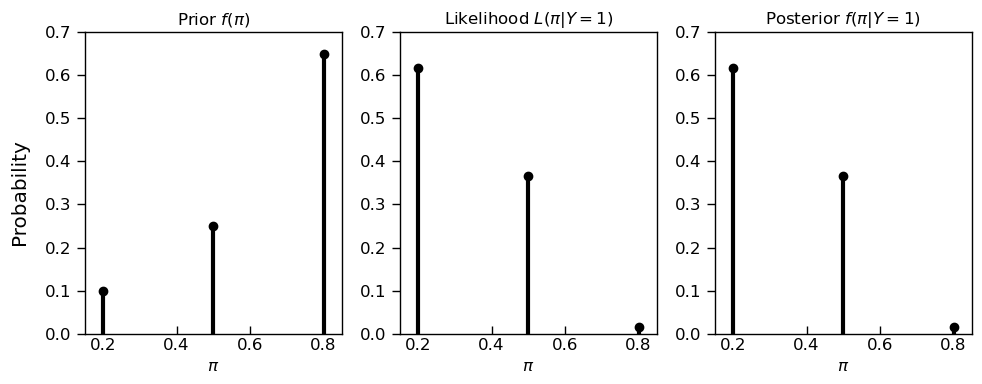

In [23]:
# Pi values and corresponding data
pi_values = [0.2, 0.5, 0.8]
f_pi = [0.10, 0.25, 0.65]  # Prior probabilities
L_pi_given_Y1 = [0.617, 0.367, 0.015]  # Likelihoods given Y=1
posterior = [0.617, 0.367, 0.015]  # Posterior, assumed same as likelihoods here

# Create subplots for prior, likelihood, and posterior
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Prior Probability f(π)
axs[0].scatter(pi_values, f_pi, color='black', zorder=2)
for xx, yy in zip(pi_values, f_pi):
    axs[0].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[0].set_title(r'Prior $f(\pi)$')
axs[0].set_xlim(0.15, 0.85)
axs[0].set_ylim(0, 0.7)

# Likelihood L(π|Y=1)
axs[1].scatter(pi_values, L_pi_given_Y1, color='black', zorder=2)
for xx, yy in zip(pi_values, L_pi_given_Y1):
    axs[1].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[1].set_title(r'Likelihood $L(\pi|Y=1)$')
axs[1].set_xlim(0.15, 0.85)
axs[1].set_ylim(0, 0.7)

# Posterior Probability f(π|Y=1)
axs[2].scatter(pi_values, posterior, color='black', zorder=2)
for xx, yy in zip(pi_values, posterior):
    axs[2].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[2].set_title(r'Posterior $f(\pi|Y=1)$')
axs[2].set_xlim(0.15, 0.85)
axs[2].set_ylim(0, 0.7)

# Set labels and layout
for ax in axs:
    ax.set_xlabel(r'$\pi$')

fig.supylabel('Probability')
plt.tight_layout()
plt.show()

**后验模型的计算过程**  

上图所表示的后验可写成：  

$$  
f(\pi|y=1)  
$$  

表示当团队只赢成功复现一项研究时，他成功率$\pi$的概率分布  

根据贝叶斯公式，我们可以进一步对后验概率公式进行展开：  

$$  
posterior = \frac{ prior*likelihood} {normalizing\;\;constant}  
$$  

$$  
f(\pi|y=1) = \frac{ f(\pi)L(\pi|y=1)} {f(y=1)} \quad\quad for\;\pi \in {0.2,0.5,0.8}  
$$  

$$  
f(\pi=0.2|y=1) = \frac{0.10 \times 0.3932} {0.0637} \approx 0.617  
$$  
$$  
f(\pi=0.5|y=1) = \frac{0.25 \times 0.0938} {0.0637} \approx 0.368  
$$  
$$  
f(\pi=0.8|y=1) = \frac{0.65 \times 0.0015} {0.0637} \approx 0.015  
$$ 

下表对后验概率模型进行了总结，我们可知，经过了先前只成功了一项研究的复现经历后，该团队取得成功($\pi$=0.8)的可能性已经从0.65降到了0.015  


| $\pi$	        |0.2    |0.5    |0.8 |Total  
|---------------|-----  |----   |----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65|1|  
|$f(\pi \| y=1)$   |0.617  |0.368 |0.015|1|  


**补充材料**  

省略分母的计算  
- 考虑到分母是一个常数，我们常常会成功率计算它  

省略分母后验的计算可写成：  
$$  
f(\pi=0.2|y=1) = c⋅ 0.10⋅0.3932 \propto 0.039320  
$$  

$$  
f(\pi=0.5|y=1) = c⋅ 0.25⋅0.0938 \propto 0.023450  
$$  
$$  
f(\pi=0.8|y=1) = c⋅ 0.65⋅0.0015 \propto 0.000975  
$$  

$\propto$ 表示成比例，尽管这些未经标准化的后验概率总和不等于1  
$$  
0.039320 + 0.023450 + 0.000975 = 0.063745,  
$$  
但它们的比例关系并未改变(见下图)  

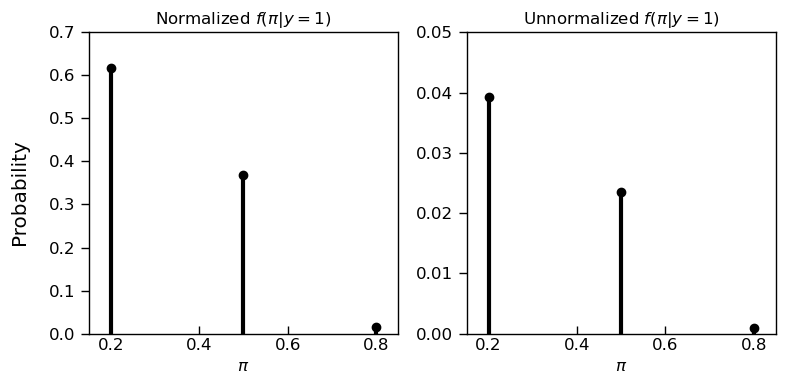

In [26]:
# Pi values and corresponding unnormalized posterior data
pi_values = [0.2, 0.5, 0.8]
unnormalized_posterior = [0.03932, 0.02345, 0.000975]  # Unnormalized posterior values
normalized_posterior = [val / sum(unnormalized_posterior) for val in unnormalized_posterior]  # Normalized

# Create subplots for normalized and unnormalized posteriors
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Normalized posterior
axs[0].scatter(pi_values, normalized_posterior, color='black', zorder=2)
for xx, yy in zip(pi_values, normalized_posterior):
    axs[0].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[0].set_title('Normalized $f(\pi | y=1)$')
axs[0].set_xlim(0.15, 0.85)
axs[0].set_ylim(0, 0.7)

# Unnormalized posterior
axs[1].scatter(pi_values, unnormalized_posterior, color='black', zorder=2)
for xx, yy in zip(pi_values, unnormalized_posterior):
    axs[1].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[1].set_title('Unnormalized $f(\pi | y=1)$')
axs[1].set_xlim(0.15, 0.85)
axs[1].set_ylim(0, 0.05)

# Set labels and layout
for ax in axs:
    ax.set_xlabel(r'$\pi$')

fig.supylabel('Probability')
plt.tight_layout()
plt.show()

我们可以使用这些未经标准化的后验概率总和作为分母，来对后验概率进行标准化，会得到相同的计算结果。  

$$  
f(\pi = 0.2 | y = 1) = \frac{0.039320}{0.039320 + 0.023450 + 0.000975} \approx 0.617  
$$  

注意，分母为所有似然值的总和，因此后验概率的计算公式还可以写成：  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} = \frac{f(\pi)L(\pi|y)}{\sum_{\text{all } \pi} f(\pi)L(\pi|y)} .  
$$

**Proportionality**  

既然$f(y)$是一个用来标准化的常数，它并不受$\pi$的影响，那么后验概率质量函数$f(\pi|y)$ 就与$f(\pi)$和$L(\pi|y)$成正比  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  
即，  

$$  
posterior \propto prior⋅ likelihood  
$$

> 😜这个性质很重要。因为分母的计算量往往比较大，需要遍历所有参数，如果参数不止一个，计算量可想而知。因此，如过能不计算分母也能计算后验，那么这样的方法(后面会介绍的MCMC算法)将会非常有实践意义。

### Posterior simulation (with code)

### 1. 定义先验模型  
- 定义多次实验可重复的成功率  
- 定义成功率出现的可能性 (注意，其和为1)

In [33]:
import pandas as pd
import numpy as np

# 定义可能的成功率
replicated = pd.DataFrame({'pi':[0.2, 0.5, 0.8]})

# 定义先验模型
prior = [0.10, 0.25, 0.65]

### 2. 模拟在特定成功率下，6项研究中的成功次数  
- 重复这个过程10000次

In [34]:
# 设置随机数种子保证可重复性
np.random.seed(84735)

# 从先验中抽取10000个 pi 值，并生成对应的y值

replicated_sim = replicated.sample(n=10000, weights=prior, replace=True)
replicated_sim['y'] = np.random.binomial(n=6, p=replicated_sim['pi'], size=len(replicated_sim))
replicated_sim.head(10)

,pi,y
1,0.5,1
2,0.8,5
2,0.8,4
2,0.8,4
2,0.8,4
2,0.8,3
2,0.8,5
2,0.8,5
2,0.8,4
2,0.8,6


In [35]:
#对pi的抽取情况进行总结
replicated_counts =  replicated_sim['pi'].value_counts().reset_index()

replicated_counts.columns = ['pi','n']

replicated_counts['percentage'] = (replicated_counts['n']/len(replicated_sim))

replicated_counts = replicated_counts.sort_values(by='pi')

print(replicated_counts)

    pi     n  percentage
2  0.2  1037      0.1037
1  0.5  2495      0.2495
0  0.8  6468      0.6468


### 3.  不同成功率下，不同成功次数的分布情况$f(y|\pi)$

d:\01Redirect\04miniconda\envs\pymc5_3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Epool\AppData\Local\Temp\ipykernel_7516\1013108094.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


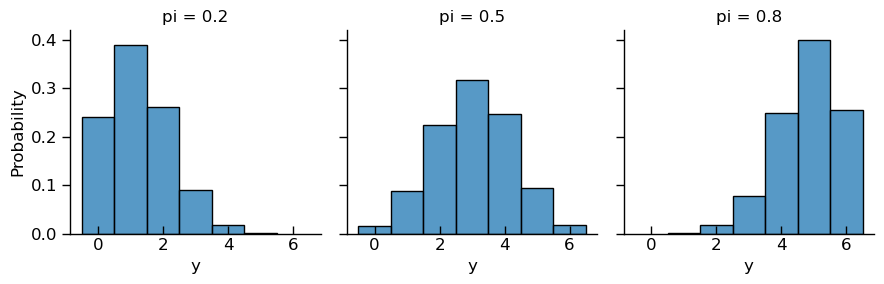

In [36]:
# 导入绘图工具 seaborn
import seaborn as sns
# 通过 facegrid 方法根据不同变量绘制不同的图形
replicated_lik = sns.FacetGrid(replicated_sim,col="pi")
replicated_lik.map(sns.histplot,'y',stat='probability',discrete=True)
plt.tight_layout()
plt.show()

### 4. 查看$y=1$时，对应的$\pi$的分布情况

In [37]:
replicated_post = replicated_sim[replicated_sim['y'] == 1].value_counts()
replicated_post

pi   y
0.2  1    403
0.5  1    219
0.8  1     10
Name: count, dtype: int64

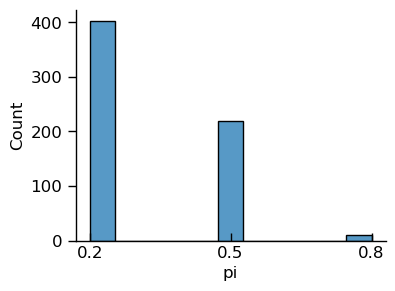

In [38]:
replicated_post = replicated_sim[replicated_sim['y'] == 1]

replicated_post_plot = sns.histplot(data = replicated_post, x="pi")

#plt.xticks(np.arange(0.2,0.8,0.3))

replicated_post_plot.set(xticks=[0.2,0.5,0.8])
sns.despine()

## Part 4: 频率学派与贝叶斯学派的对比

### 频率学派如何看待这个世界？  


在对比频率学派与贝叶斯学派的差异之前，让我们首先回顾一下频率学派是如何看待这个世界的。


![Image Name](https://cdn.kesci.com/upload/image/rhqcgapoeq.png?imageView2/0/w/960/h/960)  


我们假设存在两个城市，其中A城市的平均工资为$6000$元每月，B城市的平均工资为$6500$元每月。  

然后，由于两个城市的人口太多，通过两个城市中所有人的工资去计算平均工作是*费时费力的*。其次，对于‘地球中大陆的占比’的问题，记录所有的陆地和海洋是不太可能的。  

因此，统计学家选择 **抽样** 的方式通过 **样本** 来估计两个城市 **总体** 的均值。

值得注意的是：  

1. 这个例子中两个总体均值的差异(工资差异)是**固定的**，即世界的真相是固定的。然而在真实的“大世界”中，比如人们幸福感上的差异，差异的“真相”是我们想要探索的，未知的。  

2. 通过抽样的方式去估计总体会存在**噪音**或者*偏差*。  

3. 频率学派认为**概率**是噪音的体现。结合前两点，两个城市的差异是固定的，而抽样带来了误差，因此概率代表的是样本能代表总体的概率。  

4. 噪音受到抽样**样本大小**和工资方差**变异**的影响。另一个常见的问题是抽样样本的概率分布与样本大小和总体方差有关，如下图。


![Image Name](https://cdn.kesci.com/upload/image/rhqcnfd9gl.png?imageView2/0/w/480/h/480)  


最后，频率学派如何**推断**出两个总体之间的差异？  
- 由于两个总体间的差异是固定的，因此，判断差异是否显著与噪声大小有关，即信噪比。  
- 频率学派通过零假设的显著性检验(Null hypothesis significant test, NHST)来判断这个显著性。即通过拒绝极端值的方式避免噪音的影响。在数学上通过计算置信区间(confidence interval)和$p$值来帮助推断过程。

### 贝叶斯学派如何看待这个世界？

贝叶斯学派的出现与兴趣在于频率学派所存在的问题。  
主要体现在2个方面：  
1. 世界的真相(差异)可能不是固定的。比如对于复杂世界现象背后的机制是难以确定的。  
2. 通过抽样样本去替代总体容易出现偏差。比如由于抽到极端值从而错误的估计总体。此外，相关的问题还有type Ⅰ错误，统计检验力，*p*-hacking等。

贝叶斯学派提供了另一种角度去解释上述的问题。  

- 首先，贝叶斯学派认为世界的真相不是固定不变的，并且他们通过概率去描述这种变化。比如，两个城市平均工资的差异可能受到各种因素的影响，因此这个差异不是固定的。而两个城市平均工资的差异或可能性，比如这个差异为$500$的概率为$80$%，代表了个体对这个差异的信念**(belief)**，比如有$80$%的把握相信这个差异为$500$。  

- 其次，贝叶斯学派并不是通过NHST来推测这个差异。而是通过贝叶斯公式。需要注意的是，虽然贝叶斯学派认为世界的真相并不是固定的，但总世界中所观测的现象(抽样样本得到的数据)是固定的。因此，对于世界真相的信念可以根据数据进行更新。

#### Thomas Bayes  
![Image Name](https://pic2.zhimg.com/v2-ae48785e2b67af851e236b3d38c78c8d_r.jpg)  


#### Pierre Simon Laplace  

![Image Name](https://th.bing.com/th/id/R.c252b05834293b10a3005882940d6622?rik=Kr8G5HIK%2fObbHw&riu=http%3a%2f%2fimages.fineartamerica.com%2fimages-medium-large%2fpierre-simon-marquis-de-laplace-maria-platt-evans.jpg&ehk=uHIIZ0qdCLmD0FXAHR4lUGfySQGNKlhNkJgoWIOMJG4%3d&risl=&pid=ImgRaw&r=0)  


### 两个学派的差异对比  


|                     | 频率学派   | 贝叶斯学派   |  
| ------------------- | ---------- | ------------ |  
| 世界真相 (参数) | 固定       | 变化         |  
| 概率                | 抽样的噪音 | 信念         |  
| 推断过程            | NHST       | 贝叶斯定理   |  
| 数据                | 存在噪音   | 固定         |  
| 推断可更新性        | 否         | 是           |  
| 主观性              | 前提预设   | 通过先验设定 |

### 贝叶斯的主观性  

**任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:**  

* 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解  

* 频率学派的主观性暗含在各种**前提预设**中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。  

* 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，$p$值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。  

* 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。  



#### 重复抽样的不同作用

##### 频率学派  
* 统计推断依赖于参数的**抽样分布**，即只要无限(long-run)的进行抽样，样本分布的参数就会有某种分布形式；  
* NHST中的$p$值和置信区间的解读均依赖于“无限次抽样”的预设；  
* 实际操作中，我们往往只会收集一次数据，并不会反复的进行抽样；有些情境中，预设“无限次重复抽样并不合理；  

##### 贝叶斯学派  
* 假定参数本身是分布，不确定性一起存在于推断之中；  
* 直接根据数据对先验信念进行更新；  

**置信区间(confidence interval) vs 可信区间(credible interval)**  

**No free lunch: 各有优势和缺陷**

#### 不同的先验和似然会产生不同的后验分布  

![Image Name](https://cdn.kesci.com/upload/image/rhqcb9gji7.png?imageView2/0/w/500/h/500)  


#### NHST的"弱项"

* 无法直接对零假设(null hypothesis)进行支持，即如果两个总体没有显著差异，他们的相似程度有多少？  (许岳培等, 2023, *应用心理学*)  

* 一次性只能对比两个总体的假设进行比较；  

* 控制假阳性是一个棘手的问题